<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" 
height="250px">


 # <center> **01. Python review!** </center>




##  **Outline**
1. [**Librerias**](#eje1)
2. [**Importación de datos**](#eje2)
3. [**Relación masa-radio para cada E.O.S y respectivo ajuste**](#eje3)
4. [**rcontact/risco**](#eje4)
5. [**rcontact/rms**](#eje5)
5. [**risco/rms**](#eje6)

## Librerias  <a name="eje1"></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.constants as sci
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

## Importación de datos <a name="eje2"></a>
### Los subíndices no dan cuenta de la estrella sino de la E.O.S

In [39]:
# %%

datos1 = np.loadtxt("MassRadius_TM1L.dat")
datos2= np.loadtxt("MassRadius_NL3L.dat")
datos3= np.loadtxt("MassRadius_GM1L.dat")
m1 = datos1[:, 1]*(2*(10**30)) #en kg
m2 = datos2[:, 1]*(2*(10**30)) #en kg
m3 = datos3[:, 1]*(2*(10**30)) #en kg
r1 = datos1[:, 0]*(10**3) # en metros
r2 = datos2[:, 0]*(10**3) # en metros
r3 = datos3[:, 0]*(10**3) # en metros


## Relación masa radio para cada E.O.S y ajuste <a name="eje3"></a>

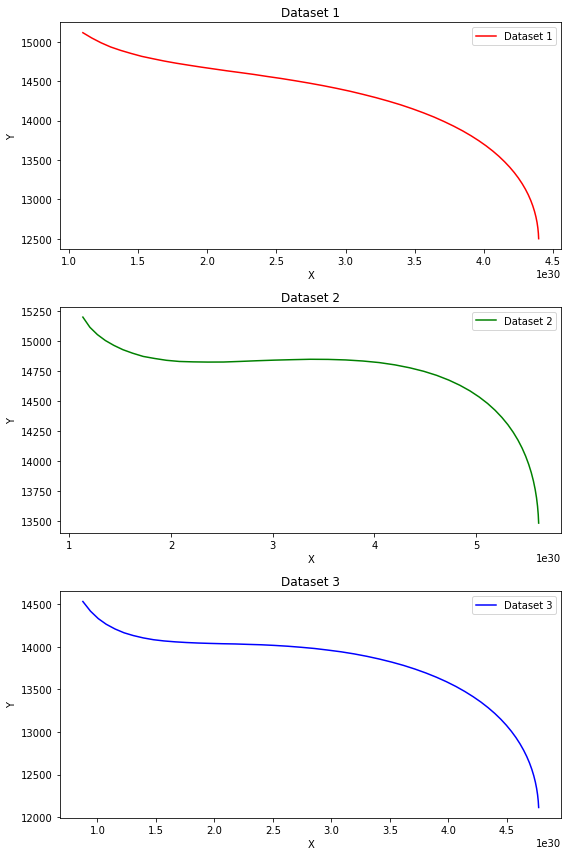

In [40]:
# masa contra radio

# Crear subgráficos
plt.figure(figsize=(8, 12))

# Subplot 1
plt.subplot(3, 1, 1)
plt.plot(m1, r1, 'r-', label='Dataset 1')
plt.title('Dataset 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Subplot 2
plt.subplot(3, 1, 2)
plt.plot(m2, r2, 'g-', label='Dataset 2')
plt.title('Dataset 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Subplot 3
plt.subplot(3, 1, 3)
plt.plot(m3, r3, 'b-', label='Dataset 3')
plt.title('Dataset 3')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [41]:
# AJUSTAMOS PARA TENER LA RELACIÓN MASA-RADIO PARA CADA ECUACIÓN DE ESTADO

def func(x, a, b, c, d, e, f):
    return f*(x**5)+ a*(x**4) + b*(x**3) + c*(x**2) +d*x +e

popt1, pcov1 = curve_fit(func, m1, r1)
popt1

popt2, pcov2 = curve_fit(func, m2, r2)
popt2

popt3, pcov3 = curve_fit(func, m3, r3)
popt3

#print(np.corrcoef(m1,r1)) 
print(popt1)
###############################
############################### (este es otro método)
# Interpolación
f1 = interp1d(m1, r1, fill_value="extrapolate")
f2 = interp1d(m2, r2, fill_value="extrapolate")
f3 = interp1d(m3, r3, fill_value="extrapolate")

# Masa para los ajustes
m_fit1 = np.linspace(m1.min(), m1.max(), 1000)
m_fit2 = np.linspace(m2.min(), m2.max(), 1000)
m_fit3 = np.linspace(m3.min(), m3.max(), 1000)

# Radio ajustado
r_fit1 = f1(m_fit1)
r_fit2 = f2(m_fit2)
r_fit3 = f3(m_fit3)

[ 1.26234225e-117 -6.42296245e-087  1.58420030e-056 -1.91397611e-026
  2.38896241e+004 -9.68329736e-149]


C:\Users\juandf\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


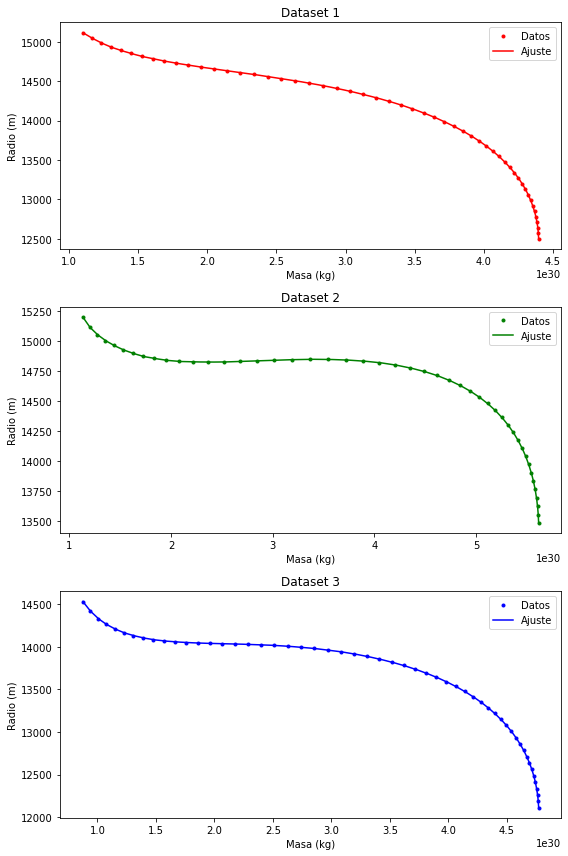

In [42]:
# Gráficos
plt.figure(figsize=(8, 12))

# Dataset 1
plt.subplot(3, 1, 1)
plt.plot(m1, r1, 'r.', label='Datos')
plt.plot(m_fit1, r_fit1, 'r-', label='Ajuste')
plt.title('Dataset 1')
plt.xlabel('Masa (kg)')
plt.ylabel('Radio (m)')
plt.legend()

# Dataset 2
plt.subplot(3, 1, 2)
plt.plot(m2, r2, 'g.', label='Datos')
plt.plot(m_fit2, r_fit2, 'g-', label='Ajuste')
plt.title('Dataset 2')
plt.xlabel('Masa (kg)')
plt.ylabel('Radio (m)')
plt.legend()

# Dataset 3
plt.subplot(3, 1, 3)
plt.plot(m3, r3, 'b.', label='Datos')
plt.plot(m_fit3, r_fit3, 'b-', label='Ajuste')
plt.title('Dataset 3')
plt.xlabel('Masa (kg)')
plt.ylabel('Radio (m)')
plt.legend()

plt.tight_layout()
plt.show()

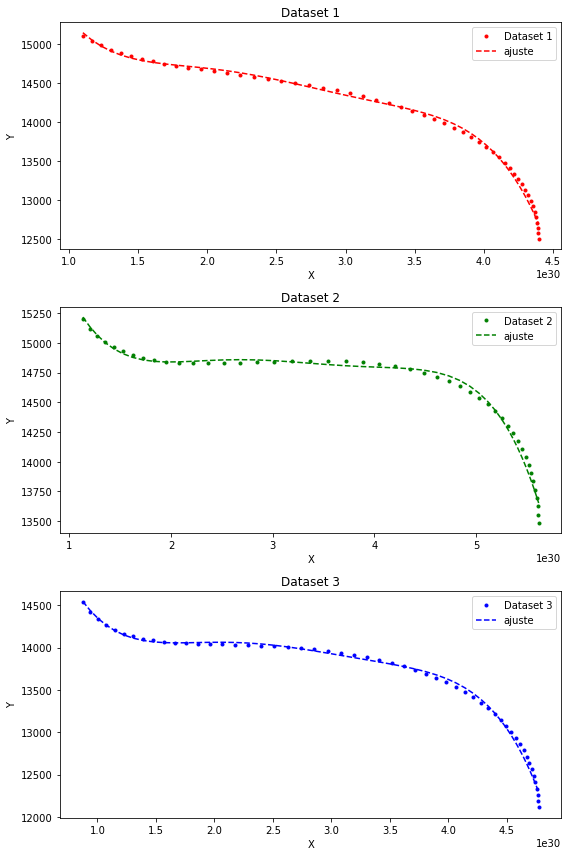

In [43]:
# VERIFICAMOS EL AJUSTE

# masa contra radio

# Crear subgráficos
plt.figure(figsize=(8, 12))

# Subplot 1
plt.subplot(3, 1, 1)
plt.plot(m1, r1, 'r.', label='Dataset 1')
plt.plot(m1, func(m1, *popt1), 'r--', label='ajuste')
plt.title('Dataset 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Subplot 2
plt.subplot(3, 1, 2)
plt.plot(m2, r2, 'g.', label='Dataset 2')
plt.plot(m2, func(m2, *popt2), 'g--', label='ajuste')
plt.title('Dataset 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Subplot 3
plt.subplot(3, 1, 3)
plt.plot(m3, r3, 'b.', label='Dataset 3')
plt.plot(m3, func(m3, *popt3), 'b--', label='ajuste')
plt.title('Dataset 3')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()

## rcont/risco <a name="eje4"></a>
### Recordar que por cada "q" hay 3 ecuaciones de estado

In [45]:
# rcont/risco q=1 funcion de la masa total

g1=((sci.c)**2)*r1/(2*m1) * (1/(3*sci.G))
g2=((sci.c)**2)*r2/(2*m2) * (1/(3*sci.G))
g3=((sci.c)**2)*r3/(2*m3) * (1/(3*sci.G))

# rcont/risco q=0.8 funcion de la masa total

def C2(m1):
    #r12=func(0.8*m1, *popt1)
    r12=f1(np.array(0.8*m1,dtype=np.float64))
    C2=sci.G*(0.8*m1)/(((sci.c)**2)*r12)
    return C2

C1=sci.G*m1/(((sci.c)**2)*r1)

h1=(C2(m1)+ 0.8*C1)/(6*(1+0.8)*C1*C2(m1))
#########################################
def C2(m1):
    #r12=func(0.8*m1, *popt2)
    r12=f2(np.array(0.8*m1,dtype=np.float64))
    C2=sci.G*(0.8*m1)/(((sci.c)**2)*r12)
    return C2

C1=sci.G*m2/(((sci.c)**2)*r2)

h2=(C2(m2)+ 0.8*C1)/(6*(1+0.8)*C1*C2(m2))
#############################################
def C2(m1):
    #r12=func(0.8*m1, *popt3)
    r12=f3(np.array(0.8*m1,dtype=np.float64))
    C2=sci.G*(0.8*m1)/(((sci.c)**2)*r12)
    return C2

C1=sci.G*m3/(((sci.c)**2)*r3)

h3=(C2(m3)+ 0.8*C1)/(6*(1+0.8)*C1*C2(m3))
#############################################

# rcont/risco q=0.7 funcion de la masa total

def C2(m1):
    #r12=func(0.7*m1, *popt1)
    r12=f1(np.array(0.7*m1,dtype=np.float64))
    C2=sci.G*(0.7*m1)/(((sci.c)**2)*r12)
    return C2

C1=sci.G*m1/(((sci.c)**2)*r1)

I1=(C2(m1)+ 0.7*C1)/(6*(1+0.7)*C1*C2(m1))
#########################################
def C2(m1):
    #r12=func(0.7*m1, *popt2)
    r12=f2(np.array(0.7*m1,dtype=np.float64))
    C2=sci.G*(0.7*m1)/(((sci.c)**2)*r12)
    return C2

C1=sci.G*m2/(((sci.c)**2)*r2)

I2=(C2(m2)+ 0.7*C1)/(6*(1+0.7)*C1*C2(m2))
#############################################
def C2(m1):
    #r12=func(0.7*m1, *popt3)
    r12=f3(np.array(0.7*m1,dtype=np.float64))
    C2=sci.G*(0.7*m1)/(((sci.c)**2)*r12)
    return C2

C1=sci.G*m3/(((sci.c)**2)*r3)

I3=(C2(m3)+ 0.7*C1)/(6*(1+0.7)*C1*C2(m3))
#############################################

# rcont/risco q=0.6, funcion de la masa total

def C2(m1):
    #r12=func(0.6*m1, *popt1)
    r12=f1(np.array(0.6*m1,dtype=np.float64))
    C2=sci.G*(0.6*m1)/(((sci.c)**2)*r12)
    return C2

C1=sci.G*m1/(((sci.c)**2)*r1)

J1=(C2(m1)+ 0.6*C1)/(6*(1+0.6)*C1*C2(m1))
#########################################
def C2(m1):
    #r12=func(0.6*m1, *popt2)
    r12=f2(np.array(0.6*m1,dtype=np.float64))
    C2=sci.G*(0.6*m1)/(((sci.c)**2)*r12)
    return C2

C1=sci.G*m2/(((sci.c)**2)*r2)

J2=(C2(m2)+ 0.6*C1)/(6*(1+0.6)*C1*C2(m2))
#############################################
def C2(m1):
    #r12=func(0.6*m1, *popt3)
    r12=f3(np.array(0.6*m1,dtype=np.float64))
    C2=sci.G*(0.6*m1)/(((sci.c)**2)*r12)
    return C2

C1=sci.G*m3/(((sci.c)**2)*r3)

J3=(C2(m3)+ 0.6*C1)/(6*(1+0.6)*C1*C2(m3))
#############################################

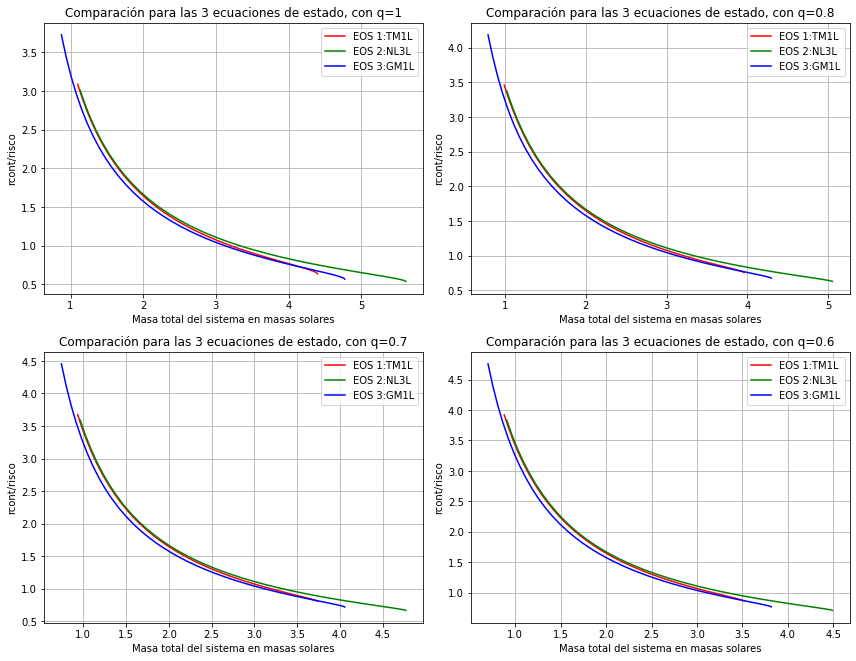

In [46]:
# Crear subgráficos
plt.figure(figsize=(12, 18))

# Subplot 1
plt.subplot(4, 2, 1)
plt.plot(2*m1/(2* 10**30), g1, 'r-', label='EOS 1:TM1L')
plt.plot(2*m2/(2* 10**30), g2, 'g-', label='EOS 2:NL3L')
plt.plot(2*m3/(2* 10**30), g3, 'b-', label='EOS 3:GM1L')
plt.title('Comparación para las 3 ecuaciones de estado, con q=1')
plt.xlabel('Masa total del sistema en masas solares')
plt.ylabel('rcont/risco')
plt.legend()
#plt.xticks(size = 15)
#plt.yticks(size = 15)
plt.grid()

# Subplot 2
plt.subplot(4, 2, 2)
plt.plot(1.8*m1/(2* 10**30), h1, 'r-', label='EOS 1:TM1L')
plt.plot(1.8*m2/(2* 10**30), h2, 'g-', label='EOS 2:NL3L')
plt.plot(1.8*m3/(2* 10**30), h3, 'b-', label='EOS 3:GM1L')
plt.title('Comparación para las 3 ecuaciones de estado, con q=0.8')
plt.xlabel('Masa total del sistema en masas solares')
plt.ylabel('rcont/risco')
plt.legend()
#plt.xticks(size = 15)
#plt.yticks(size = 15)
plt.grid()

# Subplot 3
plt.subplot(4, 2, 3)
plt.plot(1.7*m1/(2* 10**30), I1, 'r-', label='EOS 1:TM1L')
plt.plot(1.7*m2/(2* 10**30), I2, 'g-', label='EOS 2:NL3L')
plt.plot(1.7*m3/(2* 10**30), I3, 'b-', label='EOS 3:GM1L')
plt.title('Comparación para las 3 ecuaciones de estado, con q=0.7')
plt.xlabel('Masa total del sistema en masas solares')
plt.ylabel('rcont/risco')
plt.legend()
#plt.xticks(size = 15)
#plt.yticks(size = 15)
plt.grid()

# Subplot 4
plt.subplot(4, 2, 4)
plt.plot(1.6*m1/(2* 10**30), J1, 'r-', label='EOS 1:TM1L')
plt.plot(1.6*m2/(2* 10**30), J2, 'g-', label='EOS 2:NL3L')
plt.plot(1.6*m3/(2* 10**30), J3, 'b-', label='EOS 3:GM1L')
plt.title('Comparación para las 3 ecuaciones de estado, con q=0.6')
plt.xlabel('Masa total del sistema en masas solares')
plt.ylabel('rcont/risco')
plt.legend()
#plt.xticks(size = 15)
#plt.yticks(size = 15)
plt.grid()

# Mostrar los gráficos
plt.tight_layout()
plt.show()

## rcont/rms <a name="eje5"></a>
### Recordar que por cada "q" hay 3 ecuaciones de estado

In [47]:
##############################################
# rcont/rms q=1 funcion de la masa total
##############################################

q=1

def C2(m1):
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    
    return r12

C1=sci.G*m1/(((sci.c)**2)*r1)

gg1=((C2(m1)+ q*C1)/((1+q)*C1*C2(m1))) * (sci.G*(m1 + q*m1))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m1)
#############################################

def C2(m1):
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    return r12

C1=sci.G*m2/(((sci.c)**2)*r2)

gg2=((C2(m2)+ q*C1)/((1+q)*C1*C2(m2))) * (sci.G*(m2 + q*m2))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m2)

#############################################

def C2(m1):
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    return r12

C1=sci.G*m3/(((sci.c)**2)*r3)

gg3=((C2(m3)+ q*C1)/((1+q)*C1*C2(m3))) * (sci.G*(m3 + q*m3))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m3)

##############################################
# rcont/rms q=0.8 funcion de la masa total
##############################################

q=0.8

def C2(m1):
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    return r12

C1=sci.G*m1/(((sci.c)**2)*r1)

hh1=((C2(m1)+ q*C1)/((1+q)*C1*C2(m1))) * (sci.G*(m1 + q*m1))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m1)
#############################################

def C2(m1):
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    return r12

C1=sci.G*m2/(((sci.c)**2)*r2)

hh2=((C2(m2)+ q*C1)/((1+q)*C1*C2(m2))) * (sci.G*(m2 + q*m2))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m2)

#############################################

def C2(m1):
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    return r12

C1=sci.G*m3/(((sci.c)**2)*r3)

hh3=((C2(m3)+ q*C1)/((1+q)*C1*C2(m3))) * (sci.G*(m3 + q*m3))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m3)

##############################################
# rcont/rms q=0.7 funcion de la masa total
##############################################

q=0.7

def C2(m1):
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    return r12

C1=sci.G*m1/(((sci.c)**2)*r1)

II1=((C2(m1)+ q*C1)/((1+q)*C1*C2(m1))) * (sci.G*(m1 + q*m1))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m1)
#############################################

def C2(m1):
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    return r12

C1=sci.G*m2/(((sci.c)**2)*r2)

II2=((C2(m2)+ q*C1)/((1+q)*C1*C2(m2))) * (sci.G*(m2 + q*m2))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m2)

#############################################

def C2(m1):
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    return r12

C1=sci.G*m3/(((sci.c)**2)*r3)

II3=((C2(m3)+ q*C1)/((1+q)*C1*C2(m3))) * (sci.G*(m3 + q*m3))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m3)

##############################################
# rcont/rms q=0.6 funcion de la masa total
##############################################

q=0.6

def C2(m1):
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    return r12

C1=sci.G*m1/(((sci.c)**2)*r1)

JJ1=((C2(m1)+ q*C1)/((1+q)*C1*C2(m1))) * (sci.G*(m1 + q*m1))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m1)
#############################################

def C2(m1):
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    return r12

C1=sci.G*m2/(((sci.c)**2)*r2)

JJ2=((C2(m2)+ q*C1)/((1+q)*C1*C2(m2))) * (sci.G*(m2 + q*m2))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m2)

#############################################

def C2(m1):
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    return r12

C1=sci.G*m3/(((sci.c)**2)*r3)

JJ3=((C2(m3)+ q*C1)/((1+q)*C1*C2(m3))) * (sci.G*(m3 + q*m3))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m3)
#############################################

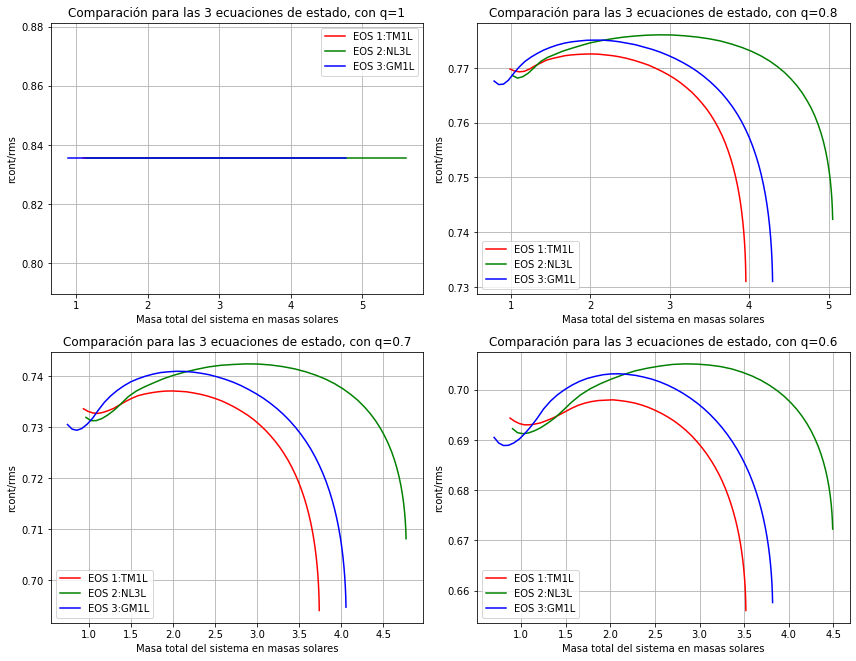

In [48]:
# Crear subgráficos
plt.figure(figsize=(12, 18))

# Subplot 1
plt.subplot(4, 2, 1)
plt.plot(2*m1/(2* 10**30), gg1, 'r-', label='EOS 1:TM1L')
plt.plot(2*m2/(2* 10**30), gg2, 'g-', label='EOS 2:NL3L')
plt.plot(2*m3/(2* 10**30), gg3, 'b-', label='EOS 3:GM1L')
plt.title('Comparación para las 3 ecuaciones de estado, con q=1')
plt.xlabel('Masa total del sistema en masas solares')
plt.ylabel('rcont/rms')
plt.legend()
#plt.xticks(size = 15)
#plt.yticks(size = 15)
plt.grid()

# Subplot 2
plt.subplot(4, 2, 2)
plt.plot(1.8*m1/(2* 10**30), hh1, 'r-', label='EOS 1:TM1L')
plt.plot(1.8*m2/(2* 10**30), hh2, 'g-', label='EOS 2:NL3L')
plt.plot(1.8*m3/(2* 10**30), hh3, 'b-', label='EOS 3:GM1L')
plt.title('Comparación para las 3 ecuaciones de estado, con q=0.8')
plt.xlabel('Masa total del sistema en masas solares')
plt.ylabel('rcont/rms')
plt.legend()
#plt.xticks(size = 15)
#plt.yticks(size = 15)
plt.grid()

# Subplot 3
plt.subplot(4, 2, 3)
plt.plot(1.7*m1/(2* 10**30), II1, 'r-', label='EOS 1:TM1L')
plt.plot(1.7*m2/(2* 10**30), II2, 'g-', label='EOS 2:NL3L')
plt.plot(1.7*m3/(2* 10**30), II3, 'b-', label='EOS 3:GM1L')
plt.title('Comparación para las 3 ecuaciones de estado, con q=0.7')
plt.xlabel('Masa total del sistema en masas solares')
plt.ylabel('rcont/rms')
plt.legend()
#plt.xticks(size = 15)
#plt.yticks(size = 15)
plt.grid()

# Subplot 4
plt.subplot(4, 2, 4)
plt.plot(1.6*m1/(2* 10**30), JJ1, 'r-', label='EOS 1:TM1L')
plt.plot(1.6*m2/(2* 10**30), JJ2, 'g-', label='EOS 2:NL3L')
plt.plot(1.6*m3/(2* 10**30), JJ3, 'b-', label='EOS 3:GM1L')
plt.title('Comparación para las 3 ecuaciones de estado, con q=0.6')
plt.xlabel('Masa total del sistema en masas solares')
plt.ylabel('rcont/rms')
plt.legend()
#plt.xticks(size = 15)
#plt.yticks(size = 15)
plt.grid()

# Mostrar los gráficos
plt.tight_layout()
plt.show()

## risco/rms <a name="eje6"></a>
### Recordar que por cada "q" hay 3 ecuaciones de estado

In [49]:
##############################################
# risco/rms q=1 funcion de la masa total
##############################################

q=1

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    return r12

ggg1= 6*(m1 + q*m1) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m1)
#############################################

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    return r12

ggg2= 6*(m2 + q*m2) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m2)
#############################################


def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    return r12

ggg3= 6*(m3 + q*m3) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m3)
#############################################

##############################################
# risco/rms q=0.8 funcion de la masa total
##############################################

q=0.8

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    return r12

hhh1= 6*(m1 + q*m1) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m1)
#############################################

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    return r12

hhh2= 6*(m2 + q*m2) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m2)
#############################################


def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    return r12

hhh3= 6*(m3 + q*m3) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m3)
#############################################

##############################################
# risco/rms q=0.7 funcion de la masa total
##############################################

q=0.7

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    return r12

III1= 6*(m1 + q*m1) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m1)
#############################################

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    return r12

III2= 6*(m2 + q*m2) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m2)
#############################################


def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    return r12

III3= 6*(m3 + q*m3) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m3)
#############################################

##############################################
# risco/rms q=1 funcion de la masa total
##############################################

q=0.6

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    return r12

JJJ1= 6*(m1 + q*m1) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m1)
#############################################

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    return r12

JJJ2= 6*(m2 + q*m2) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m2)
#############################################


def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    return r12

JJJ3= 6*(m3 + q*m3) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m3)
#############################################

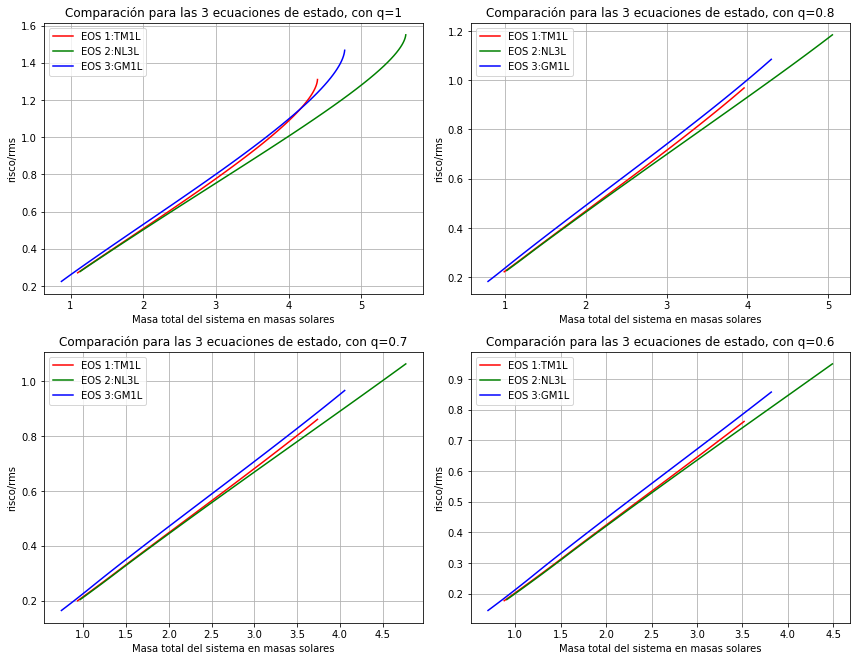

In [50]:
# Crear subgráficos
plt.figure(figsize=(12, 18))

# Subplot 1
plt.subplot(4, 2, 1)
plt.plot(2*m1/(2* 10**30), ggg1, 'r-', label='EOS 1:TM1L')
plt.plot(2*m2/(2* 10**30), ggg2, 'g-', label='EOS 2:NL3L')
plt.plot(2*m3/(2* 10**30), ggg3, 'b-', label='EOS 3:GM1L')
plt.title('Comparación para las 3 ecuaciones de estado, con q=1')
plt.xlabel('Masa total del sistema en masas solares')
plt.ylabel('risco/rms')
plt.legend()
#plt.xticks(size = 15)
#plt.yticks(size = 15)
plt.grid()

# Subplot 2
plt.subplot(4, 2, 2)
plt.plot(1.8*m1/(2* 10**30), hhh1, 'r-', label='EOS 1:TM1L')
plt.plot(1.8*m2/(2* 10**30), hhh2, 'g-', label='EOS 2:NL3L')
plt.plot(1.8*m3/(2* 10**30), hhh3, 'b-', label='EOS 3:GM1L')
plt.title('Comparación para las 3 ecuaciones de estado, con q=0.8')
plt.xlabel('Masa total del sistema en masas solares')
plt.ylabel('risco/rms')
plt.legend()
#plt.xticks(size = 15)
#plt.yticks(size = 15)
plt.grid()

# Subplot 3
plt.subplot(4, 2, 3)
plt.plot(1.7*m1/(2* 10**30), III1, 'r-', label='EOS 1:TM1L')
plt.plot(1.7*m2/(2* 10**30), III2, 'g-', label='EOS 2:NL3L')
plt.plot(1.7*m3/(2* 10**30), III3, 'b-', label='EOS 3:GM1L')
plt.title('Comparación para las 3 ecuaciones de estado, con q=0.7')
plt.xlabel('Masa total del sistema en masas solares')
plt.ylabel('risco/rms')
plt.legend()
#plt.xticks(size = 15)
#plt.yticks(size = 15)
plt.grid()

# Subplot 4
plt.subplot(4, 2, 4)
plt.plot(1.6*m1/(2* 10**30), JJJ1, 'r-', label='EOS 1:TM1L')
plt.plot(1.6*m2/(2* 10**30), JJJ2, 'g-', label='EOS 2:NL3L')
plt.plot(1.6*m3/(2* 10**30), JJJ3, 'b-', label='EOS 3:GM1L')
plt.title('Comparación para las 3 ecuaciones de estado, con q=0.6')
plt.xlabel('Masa total del sistema en masas solares')
plt.ylabel('risco/rms')
plt.legend()
#plt.xticks(size = 15)
#plt.yticks(size = 15)
plt.grid()

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [54]:
#WOW ES INDEPENDIENTE DE q jummmm

## rms vs risco vs rcont

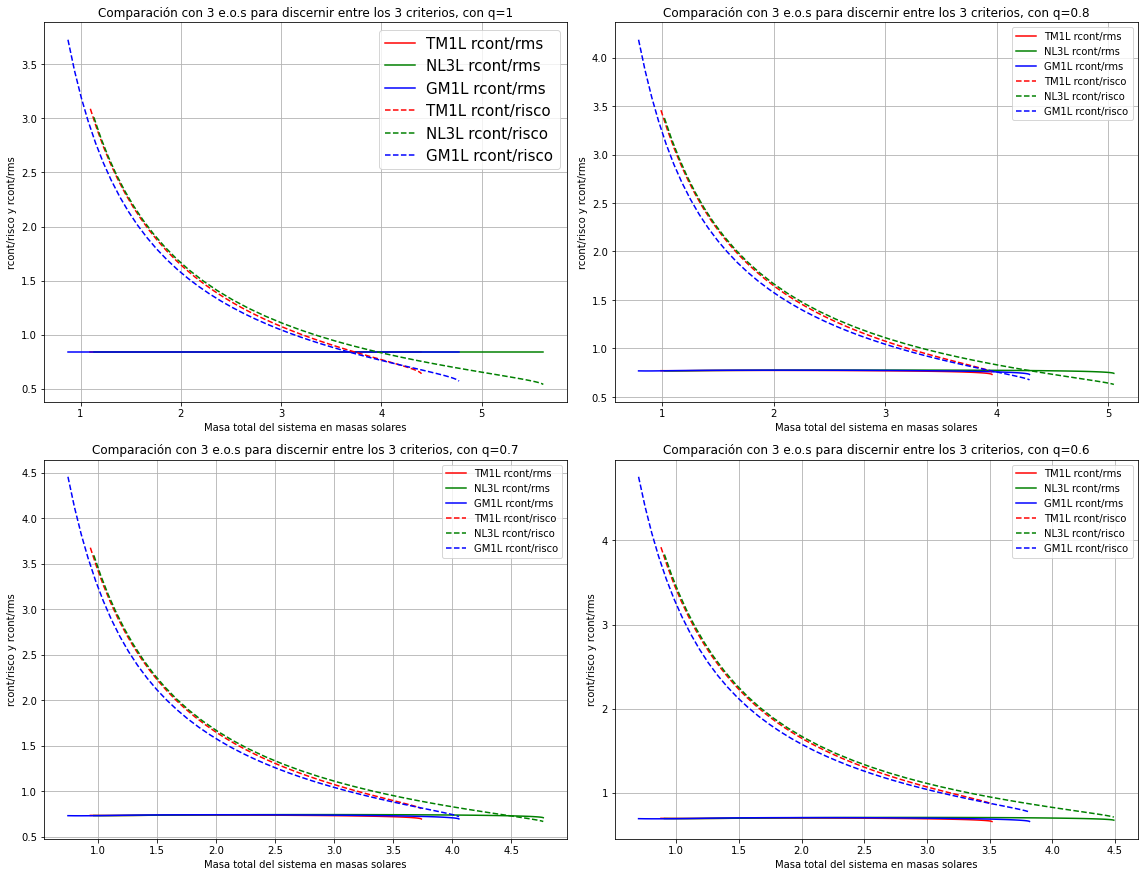

In [66]:
# %%

datos1 = np.loadtxt("MassRadius_TM1L.dat")
datos2= np.loadtxt("MassRadius_NL3L.dat")
datos3= np.loadtxt("MassRadius_GM1L.dat")
m1 = datos1[:, 1]*(2*(10**30)) #en kg
m2 = datos2[:, 1]*(2*(10**30)) #en kg
m3 = datos3[:, 1]*(2*(10**30)) #en kg
r1 = datos1[:, 0]*(10**3) # en metros
r2 = datos2[:, 0]*(10**3) # en metros
r3 = datos3[:, 0]*(10**3) # en metros

# Crear subgráficos
plt.figure(figsize=(16, 24))

# Subplot 1
plt.subplot(4, 2, 1)
plt.plot(2*m1/(2* 10**30), gg1, 'r-', label='TM1L rcont/rms')
plt.plot(2*m2/(2* 10**30), gg2, 'g-', label='NL3L rcont/rms')
plt.plot(2*m3/(2* 10**30), gg3, 'b-', label='GM1L rcont/rms')
plt.plot(2*m1/(2* 10**30), g1, 'r--', label='TM1L rcont/risco')
plt.plot(2*m2/(2* 10**30), g2, 'g--', label='NL3L rcont/risco')
plt.plot(2*m3/(2* 10**30), g3, 'b--', label='GM1L rcont/risco')
plt.title('Comparación con 3 e.o.s para discernir entre los 3 criterios, con q=1')
plt.xlabel('Masa total del sistema en masas solares')
plt.ylabel('rcont/risco y rcont/rms')
plt.legend(fontsize=15)
#plt.xticks(size = 15)
#plt.yticks(size = 15)
plt.grid()

# Subplot 2
plt.subplot(4, 2, 2)
plt.plot(1.8*m1/(2* 10**30), hh1, 'r-', label='TM1L rcont/rms')
plt.plot(1.8*m2/(2* 10**30), hh2, 'g-', label='NL3L rcont/rms')
plt.plot(1.8*m3/(2* 10**30), hh3, 'b-', label='GM1L rcont/rms')
plt.plot(1.8*m1/(2* 10**30), h1, 'r--', label='TM1L rcont/risco')
plt.plot(1.8*m2/(2* 10**30), h2, 'g--', label='NL3L rcont/risco')
plt.plot(1.8*m3/(2* 10**30), h3, 'b--', label='GM1L rcont/risco')
plt.title('Comparación con 3 e.o.s para discernir entre los 3 criterios, con q=0.8')
plt.xlabel('Masa total del sistema en masas solares')
plt.ylabel('rcont/risco y rcont/rms')
plt.legend()
#plt.xticks(size = 15)
#plt.yticks(size = 15)
plt.grid()

# Subplot 3
plt.subplot(4, 2, 3)
plt.plot(1.7*m1/(2* 10**30), II1, 'r-', label='TM1L rcont/rms')
plt.plot(1.7*m2/(2* 10**30), II2, 'g-', label='NL3L rcont/rms')
plt.plot(1.7*m3/(2* 10**30), II3, 'b-', label='GM1L rcont/rms')
plt.plot(1.7*m1/(2* 10**30), I1, 'r--', label='TM1L rcont/risco')
plt.plot(1.7*m2/(2* 10**30), I2, 'g--', label='NL3L rcont/risco')
plt.plot(1.7*m3/(2* 10**30), I3, 'b--', label='GM1L rcont/risco')
plt.title('Comparación con 3 e.o.s para discernir entre los 3 criterios, con q=0.7')
plt.xlabel('Masa total del sistema en masas solares')
plt.ylabel('rcont/risco y rcont/rms')
plt.legend()
#plt.xticks(size = 15)
#plt.yticks(size = 15)
plt.grid()

# Subplot 4
plt.subplot(4, 2, 4)
plt.plot(1.6*m1/(2* 10**30), JJ1, 'r-', label='TM1L rcont/rms')
plt.plot(1.6*m2/(2* 10**30), JJ2, 'g-', label='NL3L rcont/rms')
plt.plot(1.6*m3/(2* 10**30), JJ3, 'b-', label='GM1L rcont/rms')
plt.plot(1.6*m1/(2* 10**30), J1, 'r--', label='TM1L rcont/risco')
plt.plot(1.6*m2/(2* 10**30), J2, 'g--', label='NL3L rcont/risco')
plt.plot(1.6*m3/(2* 10**30), J3, 'b--', label='GM1L rcont/risco')
plt.title('Comparación con 3 e.o.s para discernir entre los 3 criterios, con q=0.6')
plt.xlabel('Masa total del sistema en masas solares')
plt.ylabel('rcont/risco y rcont/rms')
plt.legend()
#plt.xticks(size = 15)
#plt.yticks(size = 15)
plt.grid()

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [67]:
# para sistemas altamente simétricas y muy masivos (más de 4 masas solares el total aprox) manda risco
# para sistemas altamente simétricas y poco masivos (menos de 3.5 masas solares el total aprox) manda rms, excepto si el sistema
# es simétrico q=1 ya que no habría rms y entonces (entre 3.2 y 3.7 aprox) manda risco pero si es aún menos masivo entonces
# (menor a 3 aprox) entonces manda rcontact
# para sistemas poco simétricos independientemente de que tan masivo sea se cumple que manda rms
# (salvo al final en la 3cera gráfica línea verde) 

## Puntos de corte en función de q

In [68]:
# Puntos de corte para q=1
idx_cut1_m1 = np.argmin(np.abs(g1 - 1))
idx_cut1_m2 = np.argmin(np.abs(g2 - 1))
idx_cut1_m3 = np.argmin(np.abs(g3 - 1))

q_cut1_m1 = 2*m1[idx_cut1_m1]/(2*10**30)
q_cut1_m2 = 2*m2[idx_cut1_m2]/(2*10**30)
q_cut1_m3 = 2*m3[idx_cut1_m3]/(2*10**30)

print("Punto de corte para q=1 en Dataset 1:", q_cut1_m1)
print("Punto de corte para q=1 en Dataset 2:", q_cut1_m2)
print("Punto de corte para q=1 en Dataset 3:", q_cut1_m3)

# Puntos de corte para q=0.8
idx_cut08_m1 = np.argmin(np.abs(h1 - 1))
idx_cut08_m2 = np.argmin(np.abs(h2 - 1))
idx_cut08_m3 = np.argmin(np.abs(h3 - 1))

q_cut08_m1 = 1.8 * m1[idx_cut08_m1]/(2*10**30)
q_cut08_m2 = 1.8 * m2[idx_cut08_m2]/(2*10**30)
q_cut08_m3 = 1.8 * m3[idx_cut08_m3]/(2*10**30)

print("\nPunto de corte para q=0.8 en Dataset 1:", q_cut08_m1)
print("Punto de corte para q=0.8 en Dataset 2:", q_cut08_m2)
print("Punto de corte para q=0.8 en Dataset 3:", q_cut08_m3)

# Puntos de corte para q=0.7
idx_cut07_m1 = np.argmin(np.abs(I1 - 1))
idx_cut07_m2 = np.argmin(np.abs(I2 - 1))
idx_cut07_m3 = np.argmin(np.abs(I3 - 1))

q_cut07_m1 = 1.7 * m1[idx_cut07_m1]/(2*10**30)
q_cut07_m2 = 1.7 * m2[idx_cut07_m2]/(2*10**30)
q_cut07_m3 = 1.7 * m3[idx_cut07_m3]/(2*10**30)

print("\nPunto de corte para q=0.7 en Dataset 1:", q_cut07_m1)
print("Punto de corte para q=0.7 en Dataset 2:", q_cut07_m2)
print("Punto de corte para q=0.7 en Dataset 3:", q_cut07_m3)

# Puntos de corte para q=0.6
idx_cut06_m1 = np.argmin(np.abs(J1 - 1))
idx_cut06_m2 = np.argmin(np.abs(J2 - 1))
idx_cut06_m3 = np.argmin(np.abs(J3 - 1))

q_cut06_m1 = 1.6 * m1[idx_cut06_m1]/(2*10**30)
q_cut06_m2 = 1.6 * m2[idx_cut06_m2]/(2*10**30)
q_cut06_m3 = 1.6 * m3[idx_cut06_m3]/(2*10**30)

print("\nPunto de corte para q=0.6 en Dataset 1:", q_cut06_m1)
print("Punto de corte para q=0.6 en Dataset 2:", q_cut06_m2)
print("Punto de corte para q=0.6 en Dataset 3:", q_cut06_m3)


Punto de corte para q=1 en Dataset 1: 3.221847862
Punto de corte para q=1 en Dataset 2: 3.368829418
Punto de corte para q=1 en Dataset 3: 3.08296248

Punto de corte para q=0.8 en Dataset 1: 3.2084088174000005
Punto de corte para q=0.8 en Dataset 2: 3.3451649676
Punto de corte para q=0.8 en Dataset 3: 3.1648225824000003

Punto de corte para q=0.7 en Dataset 1: 3.2162629102999998
Punto de corte para q=0.7 en Dataset 2: 3.3023008622999996
Punto de corte para q=0.7 en Dataset 3: 3.1582229196000005

Punto de corte para q=0.6 en Dataset 1: 3.1727090880000004
Punto de corte para q=0.6 en Dataset 2: 3.3608281904000004
Punto de corte para q=0.6 en Dataset 3: 3.1192023216


In [69]:
# Puntos de corte de las curvas de risco/rms para diferentes valores de q

# Función para calcular el punto de corte de la curva
def punto_de_corte(m, ggg):
    for i in range(len(m) - 1):
        if ggg[i] <= 1 and ggg[i+1] >= 1:
            return m[i]
    return 0  # Si no hay punto de corte, se devuelve 0

# Puntos de corte para q=1
q_cut1_m1_risco = punto_de_corte(m1, ggg1)
q_cut1_m2_risco = punto_de_corte(m2, ggg2)
q_cut1_m3_risco = punto_de_corte(m3, ggg3)

# Puntos de corte para q=0.8
q_cut08_m1_risco = punto_de_corte(m1, hhh1)
q_cut08_m2_risco = punto_de_corte(m2, hhh2)
q_cut08_m3_risco = punto_de_corte(m3, hhh3)

# Puntos de corte para q=0.7
q_cut07_m1_risco = punto_de_corte(m1, III1)
q_cut07_m2_risco = punto_de_corte(m2, III2)
q_cut07_m3_risco = punto_de_corte(m3, III3)

# Puntos de corte para q=0.6
q_cut06_m1_risco = punto_de_corte(m1, JJJ1)
q_cut06_m2_risco = punto_de_corte(m2, JJJ2)
q_cut06_m3_risco = punto_de_corte(m3, JJJ3)



In [70]:
q_cut07_m1_risco

0

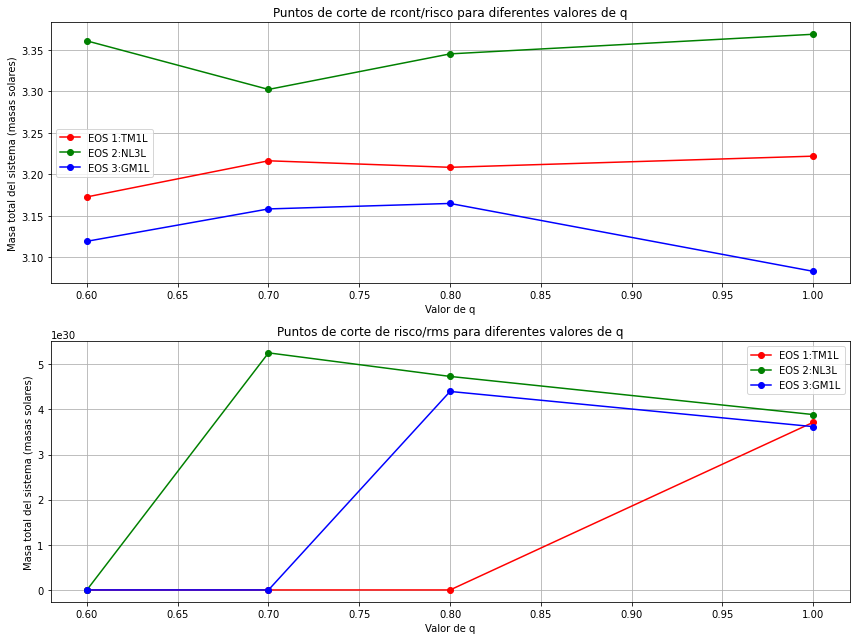

Solo se hicieron para risco/rms y rcont/risco, ya que no habían cortes en rcont/rms
y se le asignó el valor de cero para aquellas gráficas donde no había corte


In [71]:
# Crear subgráficos
plt.figure(figsize=(12, 9))

# Subplot 1
plt.subplot(2, 1, 1)
plt.plot([1, 0.8, 0.7, 0.6], [q_cut1_m1, q_cut08_m1, q_cut07_m1, q_cut06_m1], 'ro-', label='EOS 1:TM1L')
plt.plot([1, 0.8, 0.7, 0.6], [q_cut1_m2, q_cut08_m2, q_cut07_m2, q_cut06_m2], 'go-', label='EOS 2:NL3L')
plt.plot([1, 0.8, 0.7, 0.6], [q_cut1_m3, q_cut08_m3, q_cut07_m3, q_cut06_m3], 'bo-', label='EOS 3:GM1L')
plt.title('Puntos de corte de rcont/risco para diferentes valores de q')
plt.xlabel('Valor de q')
plt.ylabel('Masa total del sistema (masas solares)')
plt.legend()
plt.grid()

# Subplot 2
plt.subplot(2, 1, 2)
plt.plot([1, 0.8, 0.7, 0.6], [q_cut1_m1_risco, q_cut08_m1_risco, q_cut07_m1_risco, q_cut06_m1_risco], 'ro-', label='EOS 1:TM1L')
plt.plot([1, 0.8, 0.7, 0.6], [q_cut1_m2_risco, q_cut08_m2_risco, q_cut07_m2_risco, q_cut06_m2_risco], 'go-', label='EOS 2:NL3L')
plt.plot([1, 0.8, 0.7, 0.6], [q_cut1_m3_risco, q_cut08_m3_risco, q_cut07_m3_risco, q_cut06_m3_risco], 'bo-', label='EOS 3:GM1L')
plt.title('Puntos de corte de risco/rms para diferentes valores de q')
plt.xlabel('Valor de q')
plt.ylabel('Masa total del sistema (masas solares)')
plt.legend()
plt.grid()

# Mostrar los gráficos
plt.tight_layout()
plt.show()

print('Solo se hicieron para risco/rms y rcont/risco, ya que no habían cortes en rcont/rms\ny se le asignó el valor de cero para aquellas gráficas donde no había corte')

# Relaciones masas

## Sin masa del disco

### mc vs mtotal

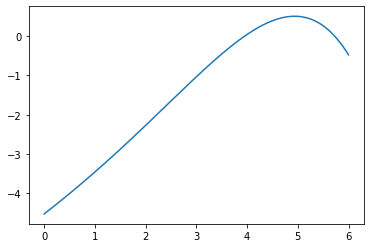

In [105]:
#ESTO SOLO ERA PARA ENTENDER DONDE ESTABAN LAS RAICES
# QUE PASA CON ESOS VALORES DE MASA? Apenas se permiten tener hasta 4 masas solares para la masa total del sistema pre-fusión

Msun = 1
q = 1
m1 = 2 # 2 masas solares la binarias más grande
mc=np.linspace(0,3*m1,1000)
k=mc/Msun + 13* (mc**2)/(200*(Msun**2)) * (1 - (0.54/130)*(mc**3.4/Msun**3.4)) - (m1 + q*m1)/Msun - (13/200)*(m1**2 + q**2 * m1**2)/(Msun**2)
plt.plot(mc,k)

In [113]:
m1 = datos1[:, 1] #en masas solares
m2 = datos2[:, 1] #en masas solares
m3 = datos3[:, 1] #en masas solares

from scipy.optimize import brentq
import numpy as np

# Definir la función
def equation(mc, m1, Msun, q):
    return mc/Msun + 13* (mc**2)/(200*(Msun**2)) * (1 - (0.54/130)*(mc**3.4/Msun**3.4)) - (m1 + q*m1)/Msun - (13/200)*(m1**2 + q**2 * m1**2)/(Msun**2)

# Definir los valores de Msun y q
Msun = 1
q = 1

# Valores de m1
m1_values = np.linspace(0.9/2, 2, 100)

# Solución para cada valor de m1
mc_solution = []
for m1 in m1_values:
    root = brentq(equation, 1/2, 5, args=(m1, Msun, q))
    mc_solution.append(root)

mc_solution = np.array(mc_solution)
#print(mc_solution)
################################################
################################################
q = 0.8

# Solución para cada valor de m1
mc_solution08 = []
for m1 in m1_values:
    root = brentq(equation, 1/2, 5, args=(m1, Msun, q))
    mc_solution08.append(root)

mc_solution08 = np.array(mc_solution08)
################################################
################################################
q = 0.7

# Solución para cada valor de m1
mc_solution07 = []
for m1 in m1_values:
    root = brentq(equation, 1/2, 5, args=(m1, Msun, q))
    mc_solution07.append(root)

mc_solution07 = np.array(mc_solution07)
################################################
################################################
q = 0.6

# Solución para cada valor de m1
mc_solution06 = []
for m1 in m1_values:
    root = brentq(equation, 1/2, 5, args=(m1, Msun, q))
    mc_solution06.append(root)

mc_solution06 = np.array(mc_solution06)
################################################
##############################################

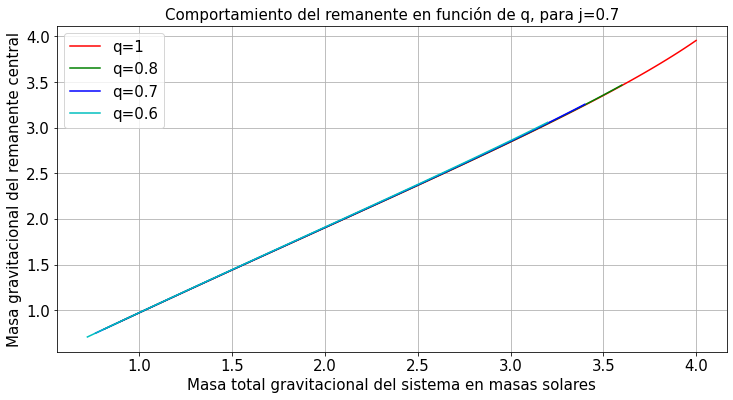

In [114]:
#ACÁ NO HAY DEPENDENCIA CON LAS E.O.S PUESTO QUE LA ECUACIÓN A RESOLVER NO DEPENDE DE LA RELACION MASA RADIO DE LAS BINARIAS
plt.figure(figsize=(12, 6))
q=1
plt.plot((m1_values+q*m1_values),mc_solution, 'r-', label='q=1')
q=0.8
plt.plot((m1_values+q*m1_values),mc_solution08, 'g-', label='q=0.8')
q=0.7
plt.plot((m1_values+q*m1_values),mc_solution07, 'b-', label='q=0.7')
q=0.6
plt.plot((m1_values+q*m1_values),mc_solution06, 'c-', label='q=0.6')
plt.title('Comportamiento del remanente en función de q, para j=0.7',fontsize=15)
plt.xlabel('Masa total gravitacional del sistema en masas solares',fontsize=15)
plt.ylabel('Masa gravitacional del remanente central',fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(fontsize=15)
plt.grid()

# LAS E.O.S DAN MASA GRAV O MASAS BARIÓNICA? (CABE ACLARAR QUE TODO HASTA EL MOMENTO SE HA HECHO COMO SI DIERAN MASA GRAV)
# LO ANTERIOR PODRÍA EXPLICAR POR QUÉ LA MASA GRAV DEL REMANENTE ES MAYOR A LA SUMA ¿no?
# Por qué todas parecen terminar en el mismo lugar? alrededor de 4? deberían terminar en puntos menores, no?

## considerando la masa del disco

### mc vs mtotal para específicos valores de masa del disco

In [131]:
m1 = datos1[:, 1] #en masas solares
m2 = datos2[:, 1] #en masas solares
m3 = datos3[:, 1] #en masas solares

from scipy.optimize import brentq
import numpy as np

# Definir la función
def equation(mc, m1, Msun, q, md):
    return mc/Msun + 13* (mc**2)/(200*(Msun**2)) * (1 - (0.54/130)*(mc**3.4/Msun**3.4)) + md/Msun - (m1 + q*m1)/Msun - (13/200)*(m1**2 + q**2 * m1**2)/(Msun**2)

# Definir los valores de Msun y q
Msun = 1
q = 1

# Valores de m1
m1_values = np.linspace(0.9/2, 2, 100)

# Definir masa del disco
md1=0.02
md2=0.04
md3=0.06
md4=0.07

# Solución para cada valor de m1 con md1
mc_solution_md1 = []
for m1 in m1_values:
    root = brentq(equation, 1/2, 5, args=(m1, Msun, q, md1))
    mc_solution_md1.append(root)

mc_solution_md1 = np.array(mc_solution_md1)
#print(mc_solution)
################################################
################################################

# Solución para cada valor de m1 con md2
mc_solution_md2 = []
for m1 in m1_values:
    root = brentq(equation, 1/2, 5, args=(m1, Msun, q, md2))
    mc_solution_md2.append(root)

mc_solution_md2 = np.array(mc_solution_md2)
#print(mc_solution)
################################################
################################################

# Solución para cada valor de m1 con md3
mc_solution_md3 = []
for m1 in m1_values:
    root = brentq(equation, 1/2, 5, args=(m1, Msun, q, md3))
    mc_solution_md3.append(root)

mc_solution_md3 = np.array(mc_solution_md3)
#print(mc_solution)
################################################
################################################

# Solución para cada valor de m1 con md4
mc_solution_md4 = []
for m1 in m1_values:
    root = brentq(equation, 1/2, 5, args=(m1, Msun, q, md4))
    mc_solution_md4.append(root)

mc_solution_md4 = np.array(mc_solution_md4)
#print(mc_solution)
################################################
################################################

Observese que no se varió el valor de q, ya que como se mostró anteriormente, este no afecta el comportamiento de las gráficas


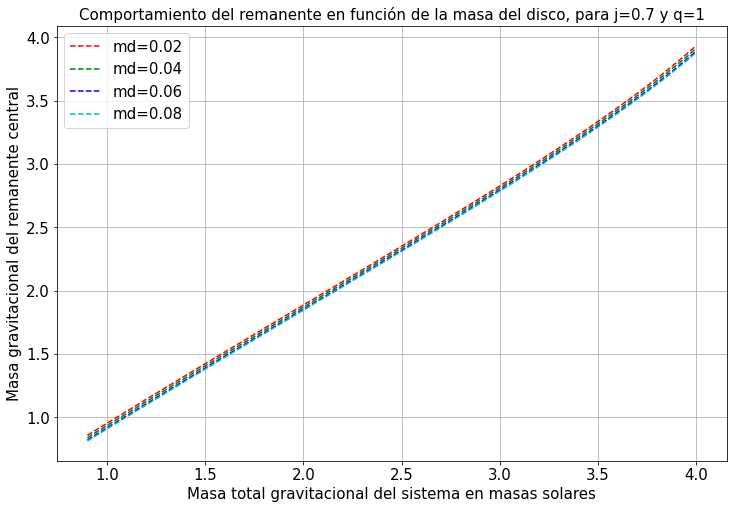

In [133]:
#ACÁ NO HAY DEPENDENCIA CON LAS E.O.S PUESTO QUE LA ECUACIÓN A RESOLVER NO DEPENDE DE LA RELACION MASA RADIO DE LAS BINARIAS
plt.figure(figsize=(12, 8))
plt.plot((m1_values+q*m1_values),mc_solution_md1, 'r--', label='md=0.02')
plt.plot((m1_values+q*m1_values),mc_solution_md2, 'g--', label='md=0.04')
plt.plot((m1_values+q*m1_values),mc_solution_md3, 'b--', label='md=0.06')
plt.plot((m1_values+q*m1_values),mc_solution_md4, 'c--', label='md=0.08')
plt.title('Comportamiento del remanente en función de la masa del disco, para j=0.7 y q=1',fontsize=15)
plt.xlabel('Masa total gravitacional del sistema en masas solares',fontsize=15)
plt.ylabel('Masa gravitacional del remanente central',fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(fontsize=15)
plt.grid()
print('Observese que no se varió el valor de q, ya que como se mostró anteriormente, este no afecta el comportamiento de las gráficas')

### md vs mc para un específico valor de masa total

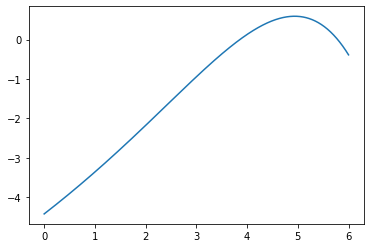

In [134]:
#ESTO SOLO ERA PARA ENTENDER DONDE ESTABAN LAS RAICES
# QUE PASA CON ESOS VALORES DE MASA? Apenas se permiten tener hasta 4 masas solares para la masa total del sistema pre-fusión

Msun = 1
q = 1
m1 = 2 # 2 masas solares la binarias más grande
mc=np.linspace(0,3*m1,1000)
mdTM1=0.093 #masas solares
mdGM1=0.073 #masas solares
k=mc/Msun + 13* (mc**2)/(200*(Msun**2)) * (1 - (0.54/130)*(mc**3.4/Msun**3.4)) + mdTM1/Msun - (m1 + q*m1)/Msun - (13/200)*(m1**2 + q**2 * m1**2)/(Msun**2)
plt.plot(mc,k)

In [135]:
m1 = datos1[:, 1] #en masas solares TM1
m2 = datos2[:, 1] #en masas solares NL3
m3 = datos3[:, 1] #en masas solares GM1

from scipy.optimize import brentq
import numpy as np

# Definir la función
def equation(mc, m1, Msun, q, md):
    return mc/Msun + 13* (mc**2)/(200*(Msun**2)) * (1 - (0.54/130)*(mc**3.4/Msun**3.4)) + md/Msun - (m1 + q*m1)/Msun - (13/200)*(m1**2 + q**2 * m1**2)/(Msun**2)

# Definir los valores de Msun, q y md
Msun = 1
q = 0.933
m1=2.909/1.933

# Valores de md
mdTM1_values = np.linspace(0, 0.093, 100)
mdGM1_values = np.linspace(0, 0.073, 100)
#

# Solución para cada valor de md con la E.O.S TM1
mc_solution = []
for md in mdTM1_values:
    root = brentq(equation, 1/2, 5, args=(m1, Msun, q, md))
    mc_solution.append(root)

mc_solutionTM1 = np.array(mc_solution)

# Solución para cada valor de md con la E.O.S GM1
mc_solution = []
for md in mdGM1_values:
    root = brentq(equation, 1/2, 5, args=(m1, Msun, q, md))
    mc_solution.append(root)

mc_solutionGM1 = np.array(mc_solution)

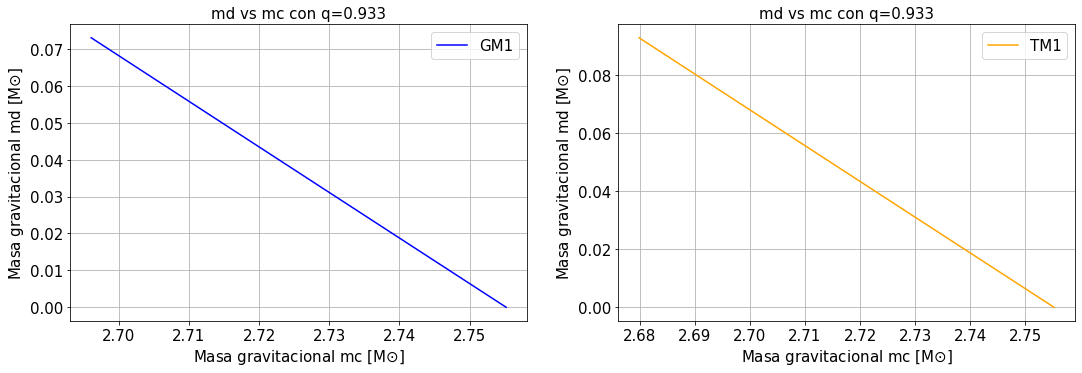

In [136]:
plt.figure(figsize=(18, 12))

# Subplot 1
plt.subplot(2, 2, 1)
plt.plot(mc_solutionGM1,mdGM1_values, 'b-', label='GM1')
plt.title('md vs mc con q=0.933', fontsize=15)
plt.xlabel('Masa gravitacional mc [M$\odot$]', fontsize=15)
plt.ylabel('Masa gravitacional md [M$\odot$]', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()

# Subplot 2
plt.subplot(2, 2, 2)
plt.plot(mc_solutionTM1,mdTM1_values, '-', color='orange', label='TM1')
plt.title('md vs mc con q=0.933', fontsize=15)
plt.xlabel('Masa gravitacional mc [M$\odot$]', fontsize=15)
plt.ylabel('Masa gravitacional md [M$\odot$]', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()

In [140]:
5.73 - (0.7* (2.75522295**2)) - 0.417

-0.0008774529446899382

In [ ]:
# Puntos de corte en función de q (YAP)
# graficar los 3 griterios en una sola para q=1,0.8...(YAP)
# sol codigo brntq para resolver ecuas (YAP), 
#(interp1d para interpolar mejor) (no deja evaluar cualquier array)(YAP)
# reproducir md vs mc (valores de mtotal definidos en universe y j=0.7)(YAP)

In [ ]:
#normalizar todo desde el inicio (Las funciones ahora si pasan a trabajar con números grandes unu sin embargo para relaciones de masa no hay lío)
#meditar porque la masa del disco no es libre?(porque depende de la isco?)
# mc vs mtotal con masa del disco (TM1 y GM1)
#(replicar figura 2 md vs mc defino mtotal y q y mdisco defino el rango dado en las gráficas, se resuelve mc)(YAP)

In [ ]:
#Adimencionalizar como pueda y por medio del momento angular específico determinar las cotas de que debe tener la masa del disco
# en función de la ISCO.